## Regression Project to predict the rent price of an apartment

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
data = pd.read_csv("data/raw.csv")
data.head(2)

,web-scraper-order,web-scraper-start-url,product-link,product-link-href,ad-id,Images,title,location,map-link,map-link-href,...,appliances,air-conditioning,person-outdoor-space,smoking,Posted-by,Posted-on,hydro,Heat,water,amenities
0,1655184396-4946,https://www.kijiji.ca/b-appartement-condo/vill...,51/2 for rent!,https://www.kijiji.ca/v-appartement-condo/vill...,Ad ID 1620304676,5.0,51/2 for rent!,"H8R2Z6, Canada",(View Map),https://www.kijiji.ca/v-appartement-condo/vill...,...,AppliancesNot Included,No,Personal Outdoor SpaceYardBalcony,Outdoors only,Kijiji User,7 days ago,Yard,Balcony,"<svg aria-label=""Yes: Water"" class=""icon-45982...",NaN
1,1655189645-6684,https://www.kijiji.ca/b-appartement-condo/vill...,1 Bedroom Apt. (2 1/2),https://www.kijiji.ca/v-appartement-condo/vill...,Ad ID 1621050447,4.0,1 Bedroom Apt. (2 1/2),"5220 Queen Mary Road, Montreal, QC",(View Map),https://www.kijiji.ca/v-appartement-condo/vill...,...,AppliancesLaundry (In Building),No,Personal Outdoor SpaceBalcony,Outdoors only,Kijiji User,a day ago,"<svg aria-label=""Yes: Hydro"" class=""icon-45982...","<svg aria-label=""Yes: Heat"" class=""icon-459822...","<svg aria-label=""Yes: Water"" class=""icon-45982...",AmenitiesNot Included


In [88]:
#Number of houses in the dataset
data.shape[0]

4025

In [89]:
data = data.drop(["utilities", "map-link","web-scraper-start-url", "ad-id", "map-link-href"], axis=1 ) 

In [90]:
data.columns

Index(['web-scraper-order', 'product-link', 'product-link-href', 'Images',
       'title', 'location', 'type', 'bedrooms', 'bathrooms', 'price',
       'utilities', 'wifi', 'parking', 'agreement-type', 'move-in-date',
       'pet-friendly', 'size', 'furnished', 'appliances', 'air-conditioning',
       'person-outdoor-space', 'smoking', 'Posted-by', 'Posted-on', 'hydro',
       'Heat', 'water', 'amenities'],
      dtype='object')

In [91]:
data.head(2)

,web-scraper-order,product-link,product-link-href,Images,title,location,type,bedrooms,bathrooms,price,...,appliances,air-conditioning,person-outdoor-space,smoking,Posted-by,Posted-on,hydro,Heat,water,amenities
0,1655184396-4946,51/2 for rent!,https://www.kijiji.ca/v-appartement-condo/vill...,5.0,51/2 for rent!,"H8R2Z6, Canada",Duplex/Triplex,Bedrooms: 3,Bathrooms: 1,"$1,500",...,AppliancesNot Included,No,Personal Outdoor SpaceYardBalcony,Outdoors only,Kijiji User,7 days ago,Yard,Balcony,"<svg aria-label=""Yes: Water"" class=""icon-45982...",NaN
1,1655189645-6684,1 Bedroom Apt. (2 1/2),https://www.kijiji.ca/v-appartement-condo/vill...,4.0,1 Bedroom Apt. (2 1/2),"5220 Queen Mary Road, Montreal, QC",Apartment,Bedrooms: 1,Bathrooms: 1,$900,...,AppliancesLaundry (In Building),No,Personal Outdoor SpaceBalcony,Outdoors only,Kijiji User,a day ago,"<svg aria-label=""Yes: Hydro"" class=""icon-45982...","<svg aria-label=""Yes: Heat"" class=""icon-459822...","<svg aria-label=""Yes: Water"" class=""icon-45982...",AmenitiesNot Included


In [92]:
data.type.value_counts()

Apartment         2936
Condo              642
Duplex/Triplex     290
House               58
Basement            53
Townhouse           21
Not Available       14
apartment            6
Name: type, dtype: int64

In [93]:
#fix apartment and Apartment. Drop Not Available 
def rental_type(x):
    if x=="apartment":
        return "Apartment"
    elif x=="Not Available":
        return np.nan
    else:
        return x
    
data.type = data.type.apply(lambda x: rental_type(x))
data.type.value_counts()

Apartment         2942
Condo              642
Duplex/Triplex     290
House               58
Basement            53
Townhouse           21
Name: type, dtype: int64

## Bedrooms column

In [94]:
data['bedrooms'].isna().value_counts()

False    4020
True        5
Name: bedrooms, dtype: int64

In [103]:
data = data[data['bedrooms'].notna()]

In [105]:
data.bedrooms.value_counts()

Bedrooms: 1                  1238
Bedrooms: 2                  1227
Bedrooms: 3                   560
Bedrooms: Bachelor/Studio     408
Bedrooms: 1 + Den             137
Bedrooms: 2 + Den             130
Bedrooms: 4                   116
Bedrooms: 3 + Den              96
Bedrooms: 5+                   81
Bedrooms: 4 + Den              27
Name: bedrooms, dtype: int64

In [108]:
def bedroom_count(x):
        x = str(x).split(": ")[1]
        if "Den" in x:
            return int(x.split(" + ")[0]) + 0.5 
        elif x=="5+":
            return 5
        elif x=="Bachelor/Studio":
            return 0
        else:
            return int(x)
        
        
data['bedrooms'] = data['bedrooms'].apply(lambda x: bedroom_count(x))

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

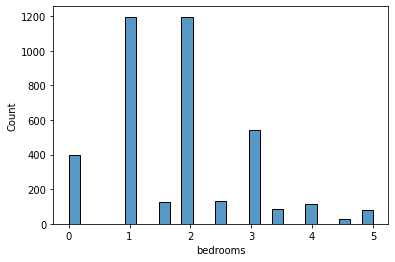

In [130]:
sns.histplot(data=data.bedrooms)

## Bathroom Column

In [110]:
data.bathrooms.value_counts()

Bathrooms: 1      3503
Bathrooms: 2       303
Bathrooms: 1.5     154
Bathrooms: 2.5      32
Bathrooms: 3        12
Bathrooms: 3.5       9
Bathrooms: 4.5       5
Bathrooms: 5.5       1
Bathrooms: 4         1
Name: bathrooms, dtype: int64

In [ ]:
def bathroom_count(x):
        x = str(x).split(": ")[1]
        return float(x)
        
        
data['bathrooms'] = data['bathrooms'].apply(lambda x: bathroom_count(x))

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

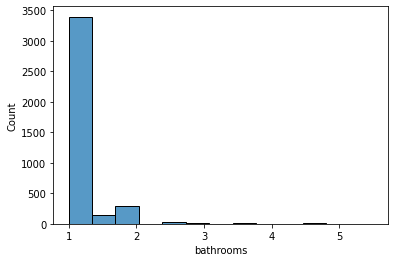

In [131]:
sns.histplot(data=data.bathrooms)

## Price Columns

In [118]:
data.price.isna().value_counts()

False    4020
Name: price, dtype: int64

In [124]:
data_test = data[data['price'] == "Please Contact"]
data = data[data['price'] != "Please Contact"]

In [125]:
def price(x):
        x = x.split("$")[1]
        x = x.strip()
        x = x.replace(",","")
    return float(x)
data['price'] = data['price'].apply(lambda x: price(x))

/var/folders/fr/193n21xx2tv_jg6bzv_n_p880000gp/T/ipykernel_95603/2124274251.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = data['price'].apply(lambda x: price(x))


<AxesSubplot:>

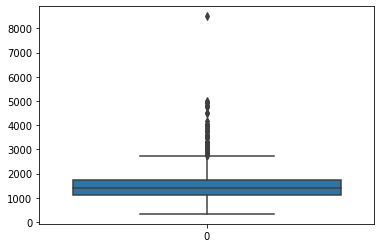

In [136]:
sns.boxplot(data=data.price)

In [134]:
## outliers exist 
data.price.describe()

count      3899.000000
mean       1685.728907
std       12445.611591
min           1.000000
25%        1100.000000
50%        1400.000000
75%        1750.000000
max      777777.000000
Name: price, dtype: float64

In [135]:
# some of the apartments are listed as 1 and some as listed as a very high value 
# --- bad practise done by listers to get attention 
data = data[(data['price'] > 100 ) & ( data['price'] < 10000)]
data.price.describe()

count    3892.000000
mean     1488.879499
std       575.542285
min       333.000000
25%      1100.000000
50%      1400.000000
75%      1750.000000
max      8500.000000
Name: price, dtype: float64

## Wifi

In [142]:
data.wifi.value_counts()
#data['wifi_available'] = data['wifi'].apply(lambda x: 0 if x=="Not Included" else 1)

In [146]:
data['wifi_internet'] = data['wifi'].apply(lambda x: 0 if "Internet" not in x else 1)

In [148]:
data['wifi_cable'] = data['wifi'].apply(lambda x: 0 if "Cable" not in x else 1)

In [150]:
data.drop(['wifi_available'], axis=1, inplace=True)

In [151]:
data.wifi.value_counts()

Not Included          3358
Internet               406
Cable / TVInternet     104
Cable / TV              24
Name: wifi, dtype: int64

## Parking

In [152]:
data.parking.value_counts()

0                3124
1                 619
2                  82
3+                 51
Not Available      16
Name: parking, dtype: int64

In [153]:
def parking(x):
    if x=="Not Available":
        return 0 
    elif x =="3+":
        return 3 
    else:
        return int(x)

In [154]:
data['parking'] = data['parking'].apply(lambda x: parking(x))

<AxesSubplot:xlabel='parking', ylabel='Count'>

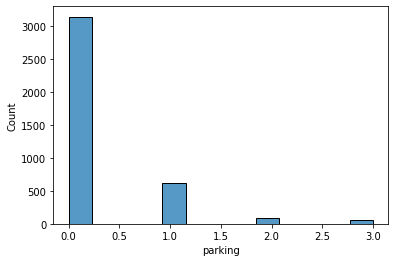

In [155]:
sns.histplot(data=data['parking'])

## Agreement type

In [156]:
data['agreement-type'].value_counts()

1 Year            3735
Month-to-month     130
Not Available       27
Name: agreement-type, dtype: int64

In [157]:
## Probably not a good idea to use it since 95% of the columns have same value

In [158]:
data.drop('agreement-type', axis=1, inplace=True)

## Pet Friendliness

In [160]:
data['pet-friendly'].value_counts()

No               14
Yes               8
Limited           4
Not Available     1
Name: pet-friendly, dtype: int64

In [163]:
## most rows have no information about being pet friendly but the ones with yes 
## are still important to retain the info 
data['pet-friendly'].fillna("Not Available", inplace=True)
data['pet_yes'] = data['pet-friendly'].apply(lambda x: 1 if "Yes" in x else 0)
data['pet_limited'] = data['pet-friendly'].apply(lambda x: 1 if "Limited" in x else 0)

In [166]:
data.drop(['pet-friendly'], axis=1, inplace=True)

## Size ( prob one important feature)

In [178]:
def size(x):
    if x=="Not Available":
        return 0 
    else:
        return int(x.replace("," , ""))


data['size'] = data['size'].apply(lambda x: size(x))
data['size'].describe()

count     3892.000000
mean       758.369219
std       1143.745420
min          0.000000
25%        409.750000
50%        725.000000
75%       1000.000000
max      50000.000000
Name: size, dtype: float64

In [179]:
#drop the rows with no size i.e. with 0 value 
data = data[data['size']>0]

<AxesSubplot:>

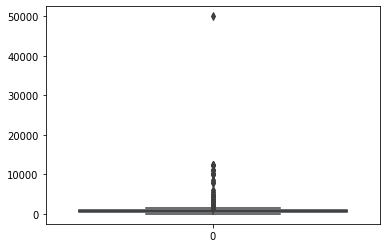

In [180]:
sns.boxplot(data=data['size'])

In [183]:
data = data[data['size']<40000]

## Furnished

In [184]:
data.furnished.value_counts()

No     2699
Yes     657
Name: furnished, dtype: int64

In [185]:
data['furnished'] = data.furnished.apply(lambda x: 1 if x=="Yes" else 0)

<AxesSubplot:xlabel='furnished', ylabel='Count'>

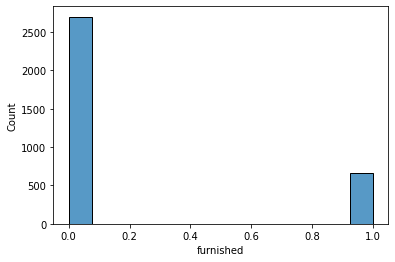

In [186]:
sns.histplot(data.furnished)

In [188]:
data['laundry_in_unit'] = data.appliances.apply(lambda x: 1 if "Laundry (In Unit)" in x else 0)
data['laundry_in_building'] = data.appliances.apply(lambda x: 1 if "Laundry (In Building)" in x else 0)
data['dishwasher'] =data.appliances.apply(lambda x: 1 if "Dishwasher" in x else 0)
data['fridge'] =data.appliances.apply(lambda x: 1 if "Fridge" in x else 0)

<AxesSubplot:xlabel='laundry_in_unit', ylabel='Count'>

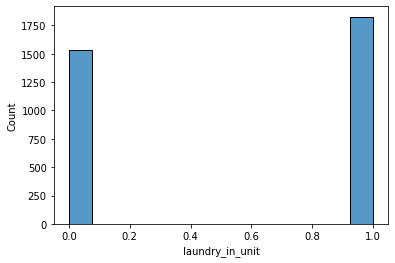

In [189]:
sns.histplot(data.laundry_in_unit)

<AxesSubplot:xlabel='laundry_in_building', ylabel='Count'>

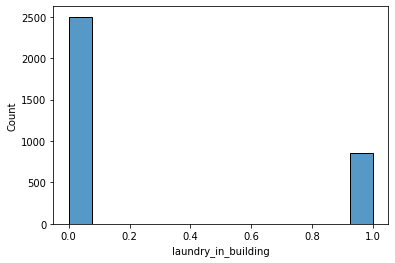

In [190]:
sns.histplot(data.laundry_in_building)

<AxesSubplot:xlabel='dishwasher', ylabel='Count'>

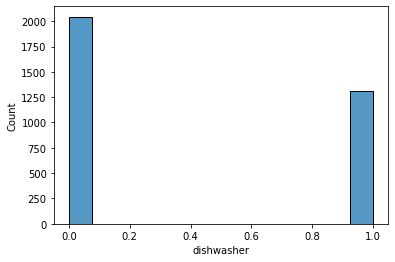

In [191]:
sns.histplot(data.dishwasher)

<AxesSubplot:xlabel='fridge', ylabel='Count'>

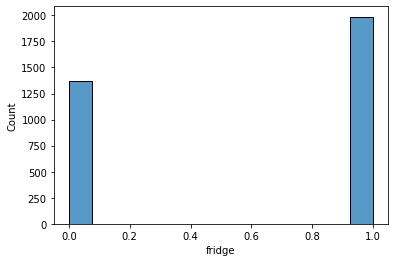

In [192]:
sns.histplot(data.fridge)

## Air Conditioning

In [193]:
data['air-conditioning'].value_counts()

No               1948
Yes              1383
Not Available       3
Name: air-conditioning, dtype: int64

In [194]:
data['air-conditioning'] = data['air-conditioning'].apply(lambda x: 1 if x=="Yes" else 0 )

<AxesSubplot:xlabel='air-conditioning', ylabel='Count'>

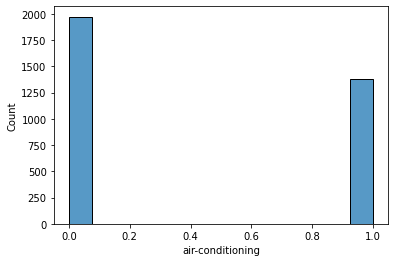

In [195]:
sns.histplot(data['air-conditioning'])

In [198]:
data['person-outdoor-space'].value_counts()
data['balcony'] = data['person-outdoor-space'].apply(lambda x: 1 if "Balcony" in x else 0)
data['yard'] = data['person-outdoor-space'].apply(lambda x: 1 if "Yard" in x else 0)
data.drop(['person-outdoor-space'], axis=1, inplace=True)

<AxesSubplot:xlabel='balcony', ylabel='Count'>

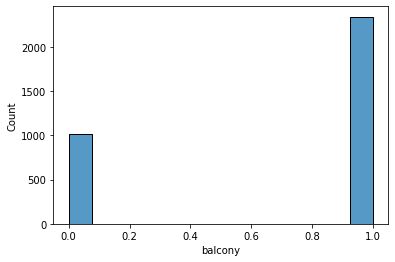

In [199]:
sns.histplot(data.balcony)

<AxesSubplot:xlabel='yard', ylabel='Count'>

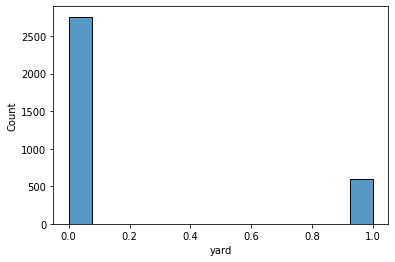

In [200]:
sns.histplot(data.yard)

## Smoking

In [201]:
data.smoking.value_counts()

No               2010
Outdoors only    1141
Yes               181
Not Available       2
Name: smoking, dtype: int64

In [117]:
data.iloc[1,:]

web-scraper-order                                         1655189645-6684
product-link                                      1 Bedroom Apt.  (2 1/2)
product-link-href       https://www.kijiji.ca/v-appartement-condo/vill...
Images                                                                4.0
title                                             1 Bedroom Apt.  (2 1/2)
location                               5220 Queen Mary Road, Montreal, QC
type                                                            Apartment
bedrooms                                                              1.0
bathrooms                                                             1.0
price                                                               $900 
utilities                                                  HydroHeatWater
wifi                                                         Not Included
parking                                                                 0
agreement-type                        